In [1]:
from langchain_openai import ChatOpenAI
import os
from dotenv import load_dotenv
load_dotenv()

llm = ChatOpenAI(api_key=os.getenv('OPENAI_API_KEY'), temperature=0.7, model='gpt-5-nano')
llm.model_name

'gpt-5-nano'

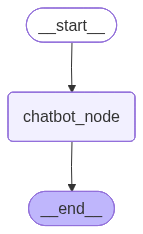

In [2]:
from typing import TypedDict, Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

def chatbot(state: State) -> State:
    return {"messages": [llm.invoke(state['messages'])]}

builder = StateGraph(State)

builder.add_node("chatbot_node", chatbot)

builder.add_edge(START, "chatbot_node")
builder.add_edge("chatbot_node", END)

graph = builder.compile()
graph    

In [3]:
response = graph.invoke({"messages":["Who was the first person to walk on the moon? Just print the name."]})
response

{'messages': [HumanMessage(content='Who was the first person to walk on the moon? Just print the name.', additional_kwargs={}, response_metadata={}, id='e99f8c55-fac9-4a89-8b83-022b522d015b'),
  AIMessage(content='Neil Armstrong', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 139, 'prompt_tokens': 22, 'total_tokens': 161, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 128, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-CYUW6mhNulix5jd9EV0AQO7iGdbKq', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--d84c7d02-efc8-478d-ad92-def0803b76f8-0', usage_metadata={'input_tokens': 22, 'output_tokens': 139, 'total_tokens': 161, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details

In [14]:
response["messages"][0].content

'Who was the first person to walk on the moon? Just print the name.'

In [15]:
response["messages"][1].content

'Neil Armstrong'

In [16]:
state = None
while True:
    in_message = input("You: ")
    if in_message.lower() in {"quit","exit"}:
        break
    if state is None:
        state: State = {
            "messages": [{"role": "user", "content": in_message}]
        }
    else:
        state["messages"].append({"role": "user", "content": in_message})

    state = graph.invoke(state)
    print("Bot:", state["messages"][-1].content)

You:  Who won the 2011 cricket world cup?


Bot: India won the 2011 Cricket World Cup. They defeated Sri Lanka in the final at the Wankhede Stadium, Mumbai, on 2 April 2011 by 6 wickets. It was India’s second World Cup title. Yuvraj Singh was the Player of the Tournament.


You:  Who was the winning capten?


Bot: MS Dhoni (Mahendra Singh Dhoni) was the winning captain of India in the 2011 Cricket World Cup.


You:  quit


In [17]:
graph.invoke({"messages": [{"role": "user", "content": "What is the price of MSFT stock?"}]})

{'messages': [HumanMessage(content='What is the price of MSFT stock?', additional_kwargs={}, response_metadata={}, id='0df403a7-15b6-4b46-80dc-4ddc21229214'),
  AIMessage(content='I don’t have real-time market data in this chat, so I can’t give you the current MSFT price. Prices change constantly during market hours.\n\nOptions to get it quickly:\n- Quick live check (manual): \n  - Google: search “MSFT stock price”\n  - Yahoo Finance: https://finance.yahoo.com/quote/MSFT\n  - Nasdaq: https://www.nasdaq.com/market-activity/stocks/msft\n- Programmatic access (example in Python):\n  - Install: pip install yfinance\n  - Code:\n    - import yfinance as yf\n    - msft = yf.Ticker("MSFT")\n    - price = msft.info.get("regularMarketPrice")\n    - print(price)\n- Price alerts: tell me a target price and I can help you set up a simple alert plan (email, SMS, etc.) or show how to implement one with a service you prefer.\n\nWould you like me to fetch a current price from a specific source if you c